In [1]:
import numpy as np # calculations with arrays
import pandas as pd # user-friendly DataFrames for data representation
import sklearn # machine learning algorithms
from sklearn import ensemble, linear_model, cross_validation, grid_search
from sklearn.metrics import log_loss
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction import DictVectorizer as DV
import xgboost as xgboost
import matplotlib.pyplot as plt # import plot functions
# necessary to plot in jupyter notebook:
%matplotlib inline
import seaborn as sns # make plots beautiful

/Users/Roman/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/Roman/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
customers_gender = pd.read_csv('customers_gender_train.csv')
customers_gender.head(2)

,customer_id,gender
0,75562265,0
1,10928546,1


In [3]:
tr_mcc_codes = pd.read_csv('tr_mcc_codes.csv', sep=';')
tr_mcc_codes.head(5)

,mcc_code,mcc_description
0,742,Ветеринарные услуги
1,1711,"Генеральные подрядчики по вентиляции, теплосна..."
2,1731,Подрядчики по электричеству
3,1799,"Подрядчики, специализированная торговля — нигд..."
4,2741,Разнообразные издательства/печатное дело


In [4]:
print len(tr_mcc_codes.mcc_code.unique())
tr_mcc_codes.mcc_code.unique()

184


array([ 742, 1711, 1731, 1799, 2741, 3000, 3351, 3501, 4111, 4112, 4121,
       4131, 4214, 4215, 4411, 4511, 4722, 4784, 4789, 4812, 4814, 4816,
       4829, 4899, 4900, 5013, 5039, 5044, 5045, 5047, 5065, 5072, 5074,
       5085, 5094, 5099, 5111, 5122, 5131, 5137, 5169, 5172, 5192, 5193,
       5199, 5200, 5211, 5231, 5251, 5261, 5300, 5309, 5310, 5311, 5331,
       5399, 5411, 5422, 5441, 5451, 5462, 5499, 5511, 5532, 5533, 5541,
       5542, 5571, 5599, 5611, 5621, 5631, 5641, 5651, 5655, 5661, 5681,
       5691, 5697, 5699, 5712, 5713, 5714, 5719, 5722, 5732, 5733, 5734,
       5735, 5811, 5812, 5813, 5814, 5816, 5912, 5921, 5931, 5940, 5941,
       5942, 5943, 5944, 5945, 5946, 5947, 5948, 5949, 5950, 5964, 5965,
       5967, 5968, 5969, 5970, 5971, 5976, 5977, 5983, 5992, 5993, 5994,
       5995, 5999, 6010, 6011, 6012, 6051, 6211, 6300, 6513, 6536, 7011,
       7210, 7216, 7221, 7230, 7273, 7278, 7298, 7299, 7311, 7338, 7372,
       7375, 7395, 7399, 7512, 7523, 7531, 7538, 75

In [5]:
transactions = pd.read_csv('transactions.csv')

In [6]:
transactions.head(2)

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN
1,39026145,1 10:19:29,6011,7010,56147.89,NaN


In [7]:
tr_type = pd.read_csv('tr_types.csv', sep=';')
tr_type.head(5)

,tr_type,tr_description
0,3200,Плата за предоставление услуг посредством моби...
1,3210,Плата за предоставление отчета по счету карты ...
2,3800,Плата за обслуживание банковской карты (за пер...
3,4000,Плата за получение наличных в Сбербанке
4,4001,Плата за получение наличных в Сбербанке (в дру...


# фичиинжиниринг 

In [8]:
customer_id_and_mcc_codes = transactions.groupby('customer_id') \
                    .apply(lambda x: x[['mcc_code']].unstack().value_counts()) \
                    .unstack() \
                    .fillna(0)

In [26]:
customer_id_and_mcc_codes.head(5)

,742,1711,1731,1799,2741,3000,3351,3501,4111,4112,...,8299,8398,8641,8699,8999,9211,9222,9311,9399,9402
customer_id,,,,,,,,,,,,,,,,,,,,,
6815,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22899,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27914,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28753,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
31385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
customer_id_and_mcc_codes.shape

(15000, 184)

In [28]:
customer_id_mean_amount = transactions.groupby('customer_id') \
                    .apply(lambda x: x[['amount']].unstack().mean())  \
                    .fillna(0)

In [29]:
customer_id_mean_amount.head()

customer_id
6815     -5528.561372
22899    -2691.438419
27914   -26820.061441
28753   -90293.479116
31385    -5972.612548
dtype: float64

In [30]:
customer_id_mean_amount.shape

(15000,)

In [31]:
customer_id_and_tr_type = transactions.groupby('customer_id') \
                    .apply(lambda x: x[['tr_type']].unstack().value_counts()) \
                    .unstack() \
                    .fillna(0)

In [32]:
customer_id_and_tr_type.head(5)

,1000,1010,1030,1100,1110,1200,1210,1310,1410,1510,...,7040,7041,7044,7070,7071,7074,7075,8100,8145,8146
customer_id,,,,,,,,,,,,,,,,,,,,,
6815,0.0,42.0,90.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22899,0.0,6.0,47.0,0.0,27.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,3.0,0.0,1.0,0.0,0.0,0.0
27914,0.0,0.0,58.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28753,0.0,89.0,25.0,3.0,65.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0
31385,0.0,75.0,125.0,0.0,75.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
first_X = pd.concat([customer_id_and_mcc_codes, customer_id_and_tr_type, customer_id_mean_amount], axis=1).reset_index()

In [34]:
first_X.head(5)

,customer_id,742,1711,1731,1799,2741,3000,3351,3501,4111,...,7041,7044,7070,7071,7074,7075,8100,8145,8146,0
0,6815,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5528.561372
1,22899,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,9.0,3.0,0.0,1.0,0.0,0.0,0.0,-2691.438419
2,27914,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-26820.061441
3,28753,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,-90293.479116
4,31385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-5972.612548


In [35]:
first_X = first_X.set_index('customer_id')

In [36]:
first_X.columns

Index([ 742, 1711, 1731, 1799, 2741, 3000, 3351, 3501, 4111, 4112,
       ...
       7041, 7044, 7070, 7071, 7074, 7075, 8100, 8145, 8146,    0],
      dtype='object', length=262)

In [37]:
first_X.head(5)

,742,1711,1731,1799,2741,3000,3351,3501,4111,4112,...,7041,7044,7070,7071,7074,7075,8100,8145,8146,0
customer_id,,,,,,,,,,,,,,,,,,,,,
6815,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5528.561372
22899,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,9.0,3.0,0.0,1.0,0.0,0.0,0.0,-2691.438419
27914,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-26820.061441
28753,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,-90293.479116
31385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-5972.612548


In [43]:
customers_gender = customers_gender.set_index('customer_id')

In [44]:
y = customers_gender.loc[first_X.index].gender
y = y.reset_index()
del y['customer_id']
y = y.dropna(0)

In [45]:
customers_gender.sort_index().head()

,gender
customer_id,
6815,0
22899,1
27914,1
28753,0
31385,0


In [46]:
y.head()

,gender
0,0.0
1,1.0
2,1.0
3,0.0
4,0.0


# фичиинжиниринг

In [8]:
transactions.head()

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN
1,39026145,1 10:19:29,6011,7010,56147.89,NaN
2,39026145,1 10:20:56,4829,2330,-56147.89,NaN
3,39026145,1 10:39:54,5499,1010,-1392.47,NaN
4,39026145,2 15:33:42,5499,1010,-920.83,NaN


In [9]:
customers_gender.reset_index(inplace=True)

In [10]:
trans = pd.merge(transactions, customers_gender, on='customer_id', how='outer')

In [11]:
customers_gender.set_index("customer_id", inplace=True)

# добавим блять полезные траты по mcc 

In [12]:
tmp = pd.merge(pd.crosstab(trans.mcc_code, trans.gender).reset_index(), tr_mcc_codes)
tmp[:5]


,mcc_code,0.0,1.0,mcc_description
0,742,167,55,Ветеринарные услуги
1,1711,18,69,"Генеральные подрядчики по вентиляции, теплосна..."
2,1731,8,65,Подрядчики по электричеству
3,1799,27,74,"Подрядчики, специализированная торговля — нигд..."
4,2741,15,18,Разнообразные издательства/печатное дело


In [13]:
abs(tmp[0.0] - tmp[1.0])/(tmp[0.0] + tmp[1.0])
tmp['k'] = (abs(tmp[0.0] - tmp[1.0])/(tmp[0.0] + tmp[1.0]))

tmp.sort('k',  ascending=False, inplace=True)
#del tmp['gender']
tmp.columns = [u'mcc_code', u'ж', u'м', u'mcc_description', u'k']
tmp.set_index(tmp.mcc_code, inplace=True)
#del tmp['mcc_code']
tmp[:10]

/Users/Roman/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,mcc_code,ж,м,mcc_description,k
mcc_code,,,,,
5967,5967,5,289,Прямой маркетинг — входящий телемаркетинг,0.965986
5931,5931,335,39,"Магазины second hand, магазины б/у товаров, ко...",0.791444
1731,1731,8,65,Подрядчики по электричеству,0.780822
7995,7995,2431,15650,Транзакции по азартным играм,0.731099
7994,7994,1164,7404,Галереи/учреждения видеоигр,0.728291
9211,9211,43,7,"Судовые выплаты, включая алименты и детскую по...",0.720000
6211,6211,133,776,Ценные бумаги: брокеры/дилеры,0.707371
7512,7512,22,123,Прокат автомобилей,0.696552
5965,5965,106,19,Прямой маркетинг — комбинированный каталог и т...,0.696000


In [14]:
usefull_mcc = tmp[:10].index

In [15]:
usefull_mcc

Int64Index([5967, 5931, 1731, 7995, 7994, 9211, 6211, 7512, 5965, 7993], dtype='int64', name=u'mcc_code')

In [16]:
extra_feat = pd.DataFrame(index = transactions.customer_id.unique(), columns=usefull_mcc).fillna(0)
extra_feat.head()

mcc_code,5967,5931,1731,7995,7994,9211,6211,7512,5965,7993
39026145,0,0,0,0,0,0,0,0,0,0
52220754,0,0,0,0,0,0,0,0,0,0
78029866,0,0,0,0,0,0,0,0,0,0
79780256,0,0,0,0,0,0,0,0,0,0
1585299,0,0,0,0,0,0,0,0,0,0


In [20]:
for cust in transactions.customer_id.unique():
    for mcc in usefull_mcc:
        extra_feat.loc[cust, mcc] = transactions[(transactions.customer_id == cust) & (transactions.mcc_code == mcc)].amount.sum()
    print cust

39026145
52220754
78029866
79780256
1585299
1645333
5524414
35059129
64627292
3765322
41870088
89720806
39472448
41519597
33529423
76508197
47853460
73496527
57045393
35234377
61034383
64294802
58227469
22716068
78729471
80573470
73173719
83340880
10690962
29481052
19513764
8681587
39868111
77963577
79452683
94651527
78002711
97634522
49430331
96661157
69161700
96088836
19186106
60723549
6019747
26847016
22570682
65605432
79532297
2158881
67984042
75101515
34039951
87618406
62735032
85187996
85056040
74920867
67755456
2368868
86569593
41481189
9156029
55045775
74331777
93860479
45356726
89788126
12811046
30195213
3180911
78186078
24796552
51028881
94899216
2314154
74975576
60111796
87961010
84027814
66825031
6443703
9497605
37521219
98513618
85036381
10229977
78841869
49724677
65617755
12500141
52701647
93677449
48224220
28386083
12509777
62939779
33423516
61024099
46769155
69942970
95047101
20525342
87269377
16542264
60953316
600423
56282562
78603033
57195308
49386123
60693557
9363087

In [24]:
extra_feat.head()

mcc_code,5967,5931,1731,7995,7994,9211,6211,7512,5965,7993
39026145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52220754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
78029866,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
79780256,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1585299,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
first_X.shape

(15000, 262)

In [48]:
extra_feat.shape

(15000, 10)

In [52]:
extra_feat.sort_index(inplace=True)

# добавим за 8 марта

In [53]:
transactions['day'] = transactions.tr_datetime.apply(lambda dt: dt.split()[0]).astype(int)

In [54]:
transactions.head()

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,day
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN,0
1,39026145,1 10:19:29,6011,7010,56147.89,NaN,1
2,39026145,1 10:20:56,4829,2330,-56147.89,NaN,1
3,39026145,1 10:39:54,5499,1010,-1392.47,NaN,1
4,39026145,2 15:33:42,5499,1010,-920.83,NaN,2


In [73]:
men_feat = pd.DataFrame(index = sorted(transactions.customer_id.unique()), columns=['mens']).fillna(0)
men_feat.head()

,mens
6815,0
22899,0
27914,0
28753,0
31385,0


In [104]:
for cust in transactions.customer_id.unique():
    summ = transactions[(transactions.day > 215) & \
                        (transactions.day < 223) & \
                        (transactions.customer_id == cust) & \
                        (
                            (transactions.mcc_code == 5992) | 
                            (transactions.mcc_code == 5094) | 
                            (transactions.mcc_code == 5631) | 
                            (transactions.mcc_code == 5944) | 
                            (transactions.mcc_code == 4812) | 
                            (transactions.mcc_code == 5947) 
                        ) \
                         ].amount.sum()
    men_feat.loc[cust,'mens'] = summ
        

# конкатенация

In [119]:
first_X.shape

(15000, 262)

In [120]:
first_X.head()

,742,1711,1731,1799,2741,3000,3351,3501,4111,4112,...,7041,7044,7070,7071,7074,7075,8100,8145,8146,0
customer_id,,,,,,,,,,,,,,,,,,,,,
6815,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5528.561372
22899,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,9.0,3.0,0.0,1.0,0.0,0.0,0.0,-2691.438419
27914,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-26820.061441
28753,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,-90293.479116
31385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-5972.612548


In [121]:
extra_feat.shape

(15000, 10)

In [122]:
extra_feat.head()

mcc_code,5967,5931,1731,7995,7994,9211,6211,7512,5965,7993
6815,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22899,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27914,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28753,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [123]:
men_feat.shape

(15000, 1)

In [124]:
men_feat.head()

,mens
6815,0.0
22899,0.0
27914,0.0
28753,0.0
31385,0.0


In [125]:
X = pd.concat([first_X, extra_feat, men_feat], axis=1)

In [126]:
X.head()

,742,1711,1731,1799,2741,3000,3351,3501,4111,4112,...,5931,1731,7995,7994,9211,6211,7512,5965,7993,mens
customer_id,,,,,,,,,,,,,,,,,,,,,
6815,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22899,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27914,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28753,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# X_train - данные для обучения
# y - метки для обучения

In [127]:
X_train = X.reset_index()
X_train = X_train.loc[y.index].set_index('customer_id')

In [128]:
X_train.shape

(12000, 273)

In [129]:
X_train.head(2)

,742,1711,1731,1799,2741,3000,3351,3501,4111,4112,...,5931,1731,7995,7994,9211,6211,7512,5965,7993,mens
customer_id,,,,,,,,,,,,,,,,,,,,,
6815,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22899,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [130]:
X_train.columns

Index([    742,    1711,    1731,    1799,    2741,    3000,    3351,    3501,
          4111,    4112,
       ...
          5931,    1731,    7995,    7994,    9211,    6211,    7512,    5965,
          7993, u'mens'],
      dtype='object', length=273)

In [131]:
y.head(10)

,gender
0,0.0
1,1.0
2,1.0
3,0.0
4,0.0
5,0.0
6,0.0
8,1.0
9,0.0
10,1.0


In [132]:
y.shape

(12000, 1)

In [133]:
model = sklearn.ensemble.ExtraTreesClassifier(max_features="sqrt", n_estimators=350)
model.fit(X_train, y)
print model.feature_importances_

/Users/Roman/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


[  1.17799783e-03   6.36910699e-04   3.40639292e-04   4.44912070e-04
   1.37898798e-04   1.75926853e-03   1.71984258e-04   7.23588679e-04
   2.10409917e-03   3.62427030e-03   1.06814834e-03   6.54694689e-04
   4.01389512e-04   7.72010362e-04   1.92382257e-04   2.61991233e-03
   2.53068479e-03   7.48692792e-04   1.90175203e-03   7.55881106e-03
   1.74235246e-02   4.59476577e-03   1.09652839e-02   2.34991183e-03
   5.03830891e-03   1.52326341e-03   1.26941879e-03   4.57015744e-04
   1.86400623e-03   2.53688300e-04   1.01341230e-03   3.59538497e-04
   1.05868672e-03   2.53308195e-04   5.76846669e-04   7.38273413e-04
   4.96638752e-04   8.81792644e-04   5.46526323e-04   5.10315087e-04
   3.45470168e-04   4.14885038e-04   7.37989482e-04   7.04406291e-04
   6.67396833e-04   6.88632242e-03   1.35260683e-02   1.50723745e-03
   6.04178502e-03   7.08515230e-03   2.62211740e-03   1.47014799e-03
   9.62083525e-04   6.49852159e-03   9.30619216e-03   4.17101668e-03
   1.30128161e-02   1.07751200e-03

## X_train – данные для обучения, y – метки для обучения

# XGB and RF parametrs

In [134]:
param = {}
param['max_depth'] = 6
param['booster'] = 'gbtree'
param['objective'] = 'binary:logistic'
param['eval_metric'] = 'auc'
param['eta'] = 0.05
param['subsample'] = 0.6
param['tree_method'] = 'exact'



In [136]:
mean_xgb = []

num_round_arr = [300, 500, 700, 900]

for num in num_round_arr:
    roc_auc_score_xgb = []
    for j in range(10):
        
        train_data, test_data, y_train, y_test = cross_validation.train_test_split(X_train, y, test_size=0.35)
        
        ## xgb_cl
        Xdatatrain = xgboost.DMatrix(data = train_data, label = y_train.gender)
        Xdatatest = xgboost.DMatrix(data = test_data, label = y_test.gender)
        plst = list(param.items())
        watchlist = [(Xdatatrain, 'train'), (Xdatatest, 'eval')]            
        xgb_cl = xgboost.train(params = plst, dtrain = Xdatatrain, num_boost_round = num)
        
        res_xgb = sklearn.metrics.roc_auc_score(y_test, xgb_cl.predict(Xdatatest))
        roc_auc_score_xgb.append(res_xgb)
    
    print roc_auc_score_xgb
    mean_xgb.append(np.mean(roc_auc_score_xgb))
    print '      xgb_mean = ', np.mean(roc_auc_score_xgb)
        

[0.86996839236404477, 0.87588865949517491, 0.86651669124770014, 0.86827418179760341, 0.873227268184398, 0.87091272869365843, 0.86904248784380367, 0.87188145336830947, 0.8801912464077718, 0.86731753617209351]
      xgb_mean =  0.871322064557
[0.86715514663599769, 0.87127927926265958, 0.87577271937796541, 0.87019720013033375, 0.86628433997921128, 0.86663273158909016, 0.87394219540051399, 0.86774797541467596, 0.87302013565148118, 0.87426610328604037]
      xgb_mean =  0.870629782673
[0.86236644120452499, 0.8752703072496244, 0.86368624229638724, 0.86140350227239249, 0.87120850811515527, 0.86955292936266937, 0.86943160651706575, 0.87490823887555558, 0.87141015172592873, 0.86905308767660716]
      xgb_mean =  0.86882910153
[0.86907851552638216, 0.87494695591529192, 0.86907567737962599, 0.86746429577181483, 0.86633619230972136, 0.86563944795859693, 0.87151999937491909, 0.87278256526199216, 0.86699376375641968, 0.86662349552285467]
      xgb_mean =  0.869046090878


In [137]:
mean_xgb = []

num_round_arr = [200, 250, 300, 350]

for num in num_round_arr:
    roc_auc_score_xgb = []
    for j in range(10):
        
        train_data, test_data, y_train, y_test = cross_validation.train_test_split(X_train, y, test_size=0.35)
        
        ## xgb_cl
        Xdatatrain = xgboost.DMatrix(data = train_data, label = y_train.gender)
        Xdatatest = xgboost.DMatrix(data = test_data, label = y_test.gender)
        plst = list(param.items())
        watchlist = [(Xdatatrain, 'train'), (Xdatatest, 'eval')]            
        xgb_cl = xgboost.train(params = plst, dtrain = Xdatatrain, num_boost_round = num)
        
        res_xgb = sklearn.metrics.roc_auc_score(y_test, xgb_cl.predict(Xdatatest))
        roc_auc_score_xgb.append(res_xgb)
    
    print roc_auc_score_xgb
    mean_xgb.append(np.mean(roc_auc_score_xgb))
    print '      xgb_mean = ', np.mean(roc_auc_score_xgb)
        

[0.86223048028673843, 0.86597362631392483, 0.86512172360728623, 0.87432547079573886, 0.87257045783835085, 0.86581644799309032, 0.86793405266260537, 0.87319758232835265, 0.87085646012124296, 0.86169284266764934]
      xgb_mean =  0.867971914461
[0.86954583685907361, 0.86371128569704436, 0.86769365815796484, 0.86562531522965791, 0.878438635752265, 0.87641280506274266, 0.86782984454202761, 0.87276398763623453, 0.86799669935769308, 0.8759853252741775]
      xgb_mean =  0.870600339357
[0.87561026829772093, 0.86621842563645446, 0.87097932805956091, 0.87334514575706257, 0.87139712748709541, 0.86508726425503124, 0.87018223807984008, 0.87298212464931935, 0.87983330568974127, 0.87033556758329711]
      xgb_mean =  0.87159707955
[0.86518761490958052, 0.8653928109705421, 0.86768977468589992, 0.86745737255941335, 0.87062686454412941, 0.87533882747487357, 0.87358947322848191, 0.87261488316123659, 0.87162415190765707, 0.87861854698589392]
      xgb_mean =  0.870814032043


# оптимальное NUMROUND = 300

In [139]:
param = {}
param['max_depth'] = 6
param['booster'] = 'gbtree'
param['objective'] = 'binary:logistic'
param['eval_metric'] = 'auc'
param['eta'] = 0.05
param['subsample'] = 0.6
param['tree_method'] = 'exact'

NUMROUND = 300

In [140]:
mean_xgb = []

subsamples  = [0.2, 0.4, 0.6, 0.8]

for sub in subsamples:
    roc_auc_score_xgb = []
    for j in range(10):
        
        train_data, test_data, y_train, y_test = cross_validation.train_test_split(X_train, y, test_size=0.35)
        
        param['subsample'] = sub
        
        ## xgb_cl
        Xdatatrain = xgboost.DMatrix(data = train_data, label = y_train.gender)
        Xdatatest = xgboost.DMatrix(data = test_data, label = y_test.gender)
        plst = list(param.items())
        watchlist = [(Xdatatrain, 'train'), (Xdatatest, 'eval')]            
        xgb_cl = xgboost.train(params = plst, dtrain = Xdatatrain, num_boost_round = NUMROUND)
        
        res_xgb = sklearn.metrics.roc_auc_score(y_test, xgb_cl.predict(Xdatatest))
        roc_auc_score_xgb.append(res_xgb)
    
    print roc_auc_score_xgb
    mean_xgb.append(np.mean(roc_auc_score_xgb))
    print '      xgb_mean = ', np.mean(roc_auc_score_xgb)
        

[0.87297747319214836, 0.86529784815688426, 0.86322154532634388, 0.86679351241221303, 0.86220127503965471, 0.86289910267171788, 0.86573358798993971, 0.86690768565248733, 0.86450258401670688, 0.8580810418902054]
      xgb_mean =  0.864861565635
[0.87124508338125362, 0.86860946690566887, 0.87084235976878754, 0.86376475214204185, 0.86123237884832227, 0.87110889808127701, 0.872534610534202, 0.87410516687979312, 0.86451357284014296, 0.86614834740012581]
      xgb_mean =  0.868410463678
[0.8735600319909782, 0.86760781371132856, 0.8700032166161199, 0.86592161527412181, 0.86811474499888075, 0.87337792545513704, 0.86919613963416031, 0.86855799283154123, 0.86790098711309882, 0.8687323300661145]
      xgb_mean =  0.869297279769
[0.8739475070242898, 0.86840584805628895, 0.86551798125450607, 0.87331842495969947, 0.87028641071958557, 0.86808453075350123, 0.87465876940770559, 0.86905696941309774, 0.87510244436377238, 0.87093831395718191]
      xgb_mean =  0.870931719991


# оптимальное subsample = 0.8

In [142]:
param = {}
param['max_depth'] = 6
param['booster'] = 'gbtree'
param['objective'] = 'binary:logistic'
param['eval_metric'] = 'auc'
param['eta'] = 0.05
param['subsample'] = 0.8
param['tree_method'] = 'exact'

NUMROUND = 300

In [145]:
mean_xgb = []

max_depth_xgb = [2, 4,  6,  8,  12, 14]

for k in max_depth_xgb:
    roc_auc_score_xgb = []
    
    for j in range(10):
        
        param['max_depth'] = k
        
        train_data, test_data, y_train, y_test = cross_validation.train_test_split(X_train, y, test_size=0.35)
    
        ## xgb_cl
        Xdatatrain = xgboost.DMatrix(data = train_data, label = y_train.gender)
        Xdatatest = xgboost.DMatrix(data = test_data, label = y_test.gender)
        plst = list(param.items())
        watchlist = [(Xdatatrain, 'train'), (Xdatatest, 'eval')]            
        xgb_cl = xgboost.train(params = plst, dtrain = Xdatatrain, num_boost_round = NUMROUND)
    
        res_xgb = sklearn.metrics.roc_auc_score(y_test, xgb_cl.predict(Xdatatest))
        print 'xgb_score = ', res_xgb
        roc_auc_score_xgb.append(res_xgb)
   
    mean_xgb.append(np.array(roc_auc_score_xgb).mean())
    print '      xgb_mean = ', np.array(roc_auc_score_xgb).mean()

xgb_score =  0.864262565707
xgb_score =  0.857905545651
xgb_score =  0.864171937895
xgb_score =  0.863280824744
xgb_score =  0.861019091754
xgb_score =  0.858421792115
xgb_score =  0.865779433025
xgb_score =  0.86368172281
xgb_score =  0.867261300819
xgb_score =  0.863282658748
      xgb_mean =  0.862906687327
xgb_score =  0.870735786835
xgb_score =  0.874173522168
xgb_score =  0.867204639107
xgb_score =  0.877375662074
xgb_score =  0.868380645007
xgb_score =  0.873536292223
xgb_score =  0.877980878302
xgb_score =  0.871625590637
xgb_score =  0.867829308334
xgb_score =  0.868553717671
      xgb_mean =  0.871739604236
xgb_score =  0.878160748911
xgb_score =  0.867956468527
xgb_score =  0.876449660994
xgb_score =  0.870307286767
xgb_score =  0.874099873467
xgb_score =  0.874610406036
xgb_score =  0.869342087124
xgb_score =  0.874571786937
xgb_score =  0.87706538592
xgb_score =  0.873697851652
      xgb_mean =  0.873626155634
xgb_score =  0.868180569003
xgb_score =  0.862623655529
xgb_sco

KeyboardInterrupt: 

# оптимальная глубина 4

In [187]:
param = {}
param['max_depth'] = 4
param['booster'] = 'gbtree'
param['objective'] = 'binary:logistic'
param['eval_metric'] = 'auc'
param['eta'] = 0.05
param['subsample'] = 0.8
param['tree_method'] = 'exact'

NUMROUND = 300

In [188]:
mean_xgb = []

for i in range(10):
    roc_auc_score_xgb = []
    
    for j in range(15):
        
        train_data, test_data, y_train, y_test = cross_validation.train_test_split(X_train, y, test_size=0.35)
    
        ## xgb_cl
        Xdatatrain = xgboost.DMatrix(data = train_data, label = y_train.gender)
        Xdatatest = xgboost.DMatrix(data = test_data, label = y_test.gender)
        plst = list(param.items())
        watchlist = [(Xdatatrain, 'train'), (Xdatatest, 'eval')]            
        xgb_cl = xgboost.train(params = plst, dtrain = Xdatatrain, num_boost_round = NUMROUND)
    
        res_xgb = sklearn.metrics.roc_auc_score(y_test, xgb_cl.predict(Xdatatest))
        print 'xgb_score = ', res_xgb
        roc_auc_score_xgb.append(res_xgb)
   
    mean_xgb.append(np.array(roc_auc_score_xgb).mean())
    print '      xgb_mean = ', np.array(roc_auc_score_xgb).mean()

xgb_score =  0.876934008845
xgb_score =  0.870720487797
xgb_score =  0.879110137435


KeyboardInterrupt: 

### теперь RF

In [160]:
mean_rf = []

max_depth = [16, 18, 20, 24, 28]


for d in max_depth:
    roc_auc_score_rf = []
    
    for j in range(7):

        
        train_data, test_data, y_train, y_test = cross_validation.train_test_split(X_train, y, test_size=0.35)
    
        ## rf
        rf = sklearn.ensemble.RandomForestClassifier(n_estimators=200, max_depth=d)
        rf.fit(train_data, y_train)
    
        res_rf = sklearn.metrics.roc_auc_score(y_test, rf.predict_proba(test_data)[ : , 1])
        print 'rf_score = ', res_rf
        roc_auc_score_rf.append(res_rf)


   
    mean_rf.append(np.array(roc_auc_score_rf).mean())
    print '      rf_mean = ', np.array(roc_auc_score_rf).mean()

/Users/Roman/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


rf_score =  0.868375809621
rf_score =  0.860811233319
rf_score =  0.859279984697
rf_score =  0.857501132616
rf_score =  0.859706497987
rf_score =  0.858559372318
rf_score =  0.858500747556
      rf_mean =  0.860390682588
rf_score =  0.860562194746
rf_score =  0.863012863529
rf_score =  0.857761375909
rf_score =  0.863563575339
rf_score =  0.854703701768
rf_score =  0.863800941385
rf_score =  0.863740420026
      rf_mean =  0.861020724672
rf_score =  0.867707123926
rf_score =  0.859968916764
rf_score =  0.865384774739
rf_score =  0.855793948344
rf_score =  0.862260529991
rf_score =  0.876121845997
rf_score =  0.87161232489
      rf_mean =  0.865549923522
rf_score =  0.861787542173
rf_score =  0.862860932268
rf_score =  0.860971889802
rf_score =  0.860647439003
rf_score =  0.879565760265
rf_score =  0.859904733902
rf_score =  0.856134542474
      rf_mean =  0.863124691412
rf_score =  0.860360259993
rf_score =  0.860311107045
rf_score =  0.863443858026
rf_score =  0.863873681237
rf_score 

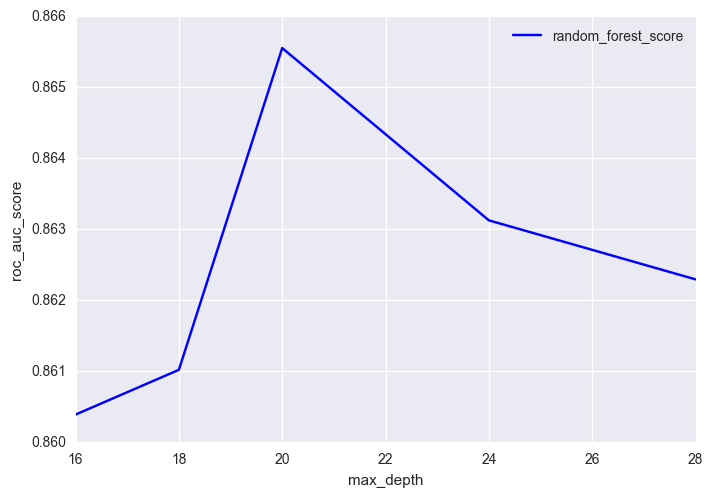

In [162]:
plt.plot(max_depth, mean_rf, c='b')
plt.xlabel('max_depth')
plt.ylabel('roc_auc_score')
plt.legend(['random_forest_score'], loc=0)

# Optimal params:
## I XGB:
    1) numrounds = 300
    2) max_depth = 4
    3) subsample = 0.8
## II RF:
    1) max_depth = 21

# COEF_ for ranking

In [163]:
from scipy.stats import rankdata
import scipy.optimize as opt

In [194]:
def fun(w):
    
    return -sklearn.metrics.roc_auc_score(y_test, (( rankdata(y_rf)*w[0] + rankdata(y_xgb)*(1-w[0]) )/3000) )

In [196]:
x_mean_rf = []
x_mean_xgb = []
for i in range(10):
    
    train_data, test_data, y_train, y_test = cross_validation.train_test_split(X_train, y, test_size=0.4)
    
    param = {}
    param['max_depth'] = 4
    param['booster'] = 'gbtree'
    param['objective'] = 'binary:logistic'
    param['eval_metric'] = 'auc'
    param['eta'] = 0.05
    param['subsample'] = 0.8
    param['tree_method'] = 'exact'

    NUMROUND = 300
    
    Xdatatrain = xgboost.DMatrix(data = train_data, label = y_train.gender)
    plst = list(param.items())
    xgb_cl = xgboost.train(params = plst, dtrain = Xdatatrain, num_boost_round = NUMROUND)
    
    Xdatatest = xgboost.DMatrix(data = test_data)
    y_xgb = xgb_cl.predict(Xdatatest)
    
    rf = sklearn.ensemble.RandomForestClassifier(n_estimators=250, max_depth=21)
    rf.fit(train_data, y_train)
    y_rf = rf.predict_proba(test_data)[:,1]
    
    root = opt.minimize(fun, method='Nelder-Mead', x0=[0.5])
    print root.x[0]
    print root.fun
    x_mean_rf.append(root.x[0])

print x_mean_rf
print np.mean(x_mean_rf)

    
    

/Users/Roman/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.14970703125
-0.874835850454
0.35791015625
-0.872930433666
0.2654296875
-0.869999856177
0.310546875
-0.869687947784
0.28505859375
-0.872798679734
0.35625
-0.877172785944
0.25615234375
-0.868575348744
0.246875
-0.865280947948
0.3732421875
-0.875107021923
0.22724609375
-0.872059687991
[0.14970703124999968, 0.35791015624999989, 0.26542968749999979, 0.31054687499999989, 0.28505859374999976, 0.35624999999999984, 0.25615234374999973, 0.24687499999999979, 0.37324218749999993, 0.22724609374999974]
0.282841796875


In [174]:
np.mean(x_mean_xgb)

0.71962599518206838

### XGB fit

In [197]:
param = {}
param['max_depth'] = 4
param['booster'] = 'gbtree'
param['objective'] = 'binary:logistic'
param['eval_metric'] = 'auc'
param['eta'] = 0.05
param['subsample'] = 0.8
param['tree_method'] = 'exact'

NUMROUND = 300


In [198]:
Xdatatrain = xgboost.DMatrix(data = X_train, label = y.gender)
plst = list(param.items())
xgb_cl = xgboost.train(params = plst, dtrain = Xdatatrain, num_boost_round = NUMROUND)

## XGB pred

In [199]:
X_test = X.drop(customers_gender.index)
result = pd.DataFrame(X_test.index, columns=['customer_id'])

In [200]:
Xdatatest = xgboost.DMatrix(data = X_test)

In [201]:
y_xgb = xgb_cl.predict(Xdatatest)

In [202]:
y_xgb

array([ 0.4335812 ,  0.69396186,  0.73322558, ...,  0.50835228,
        0.53983545,  0.02760638], dtype=float32)

In [203]:
result = pd.DataFrame(X_test.index, columns=['customer_id'])
result['gender'] = y_xgb
result.to_csv('my_sol.csv', index=False)

## RF fit

In [204]:
rf = sklearn.ensemble.RandomForestClassifier(n_estimators=250, max_depth=21)
rf.fit(X_train, y)

/Users/Roman/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=21, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=250, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [205]:
y_rf = rf.predict_proba(X_test)[:,1]

In [206]:
y_rf

array([ 0.53434801,  0.67973011,  0.68686139, ...,  0.49730728,
        0.52706096,  0.13463412])

# SUB

In [207]:
result = pd.DataFrame(X_test.index, columns=['customer_id'])
result['gender'] = y_rf * 0.282841796875  + y_xgb * (1-0.282841796876) 

In [208]:
result.to_csv('comb.csv', index=False)